# Import Library and Imputed Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mahalanobis import Mahalanobis
from scipy.stats import chi2
from func import custom_desc, custom_info, zero_std, categorical_converter, anderson_normality_test, anderson_result_extractor, outlier_counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('csv/imputed.csv')

Sebelumnya, kita telah melakukan EDA secara singkat untuk keperluan mengisi missing value. Maka, dibagian ini kita akan berfokus dengan EDA yang (sebisa mungkin) menyeluruh untuk mendapatkan temuan lanjutan. Akan ada beberapa analisa yang sebenarnya sudah dilakukan pada bagian sebelumnya, namun akan ditampilkan lagi untuk analisa lebih lanjut. 

# Numerical Univariate Analysis

Dimulai dari target, kita lihat terlebih dahulu bagaimana kondisi datanya menggunakan Countplot.

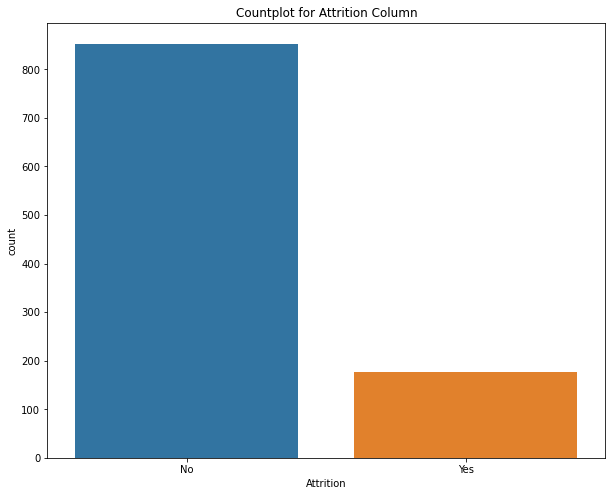

In [3]:
plt.figure(figsize = (10, 8))
plot=sns.countplot(x = 'Attrition', data = df)
plt.title("Countplot for Attrition Column")
plt.show()

In [4]:
df.Attrition.value_counts(normalize = True)

No     0.82896
Yes    0.17104
Name: Attrition, dtype: float64

**Temuan** : Kondisi data pada feature Attrition merupakan Imbalance Data.

In [5]:
categorical_by_behaviour = ['Education',
'EnvironmentSatisfaction',
'JobInvolvement',
'JobLevel',
'JobSatisfaction',
'PerformanceRating',
'RelationshipSatisfaction',
'StockOptionLevel',
'WorkLifeBalance']

In [7]:
numerical_features = df.select_dtypes(exclude='O')
numerical_features = numerical_features.drop(columns=categorical_by_behaviour, axis=1)

In [8]:
numerical_features_melt = numerical_features.melt()
numerical_features_melt.head()

,variable,value
0,Age,50.0
1,Age,36.0
2,Age,21.0
3,Age,50.0
4,Age,52.0


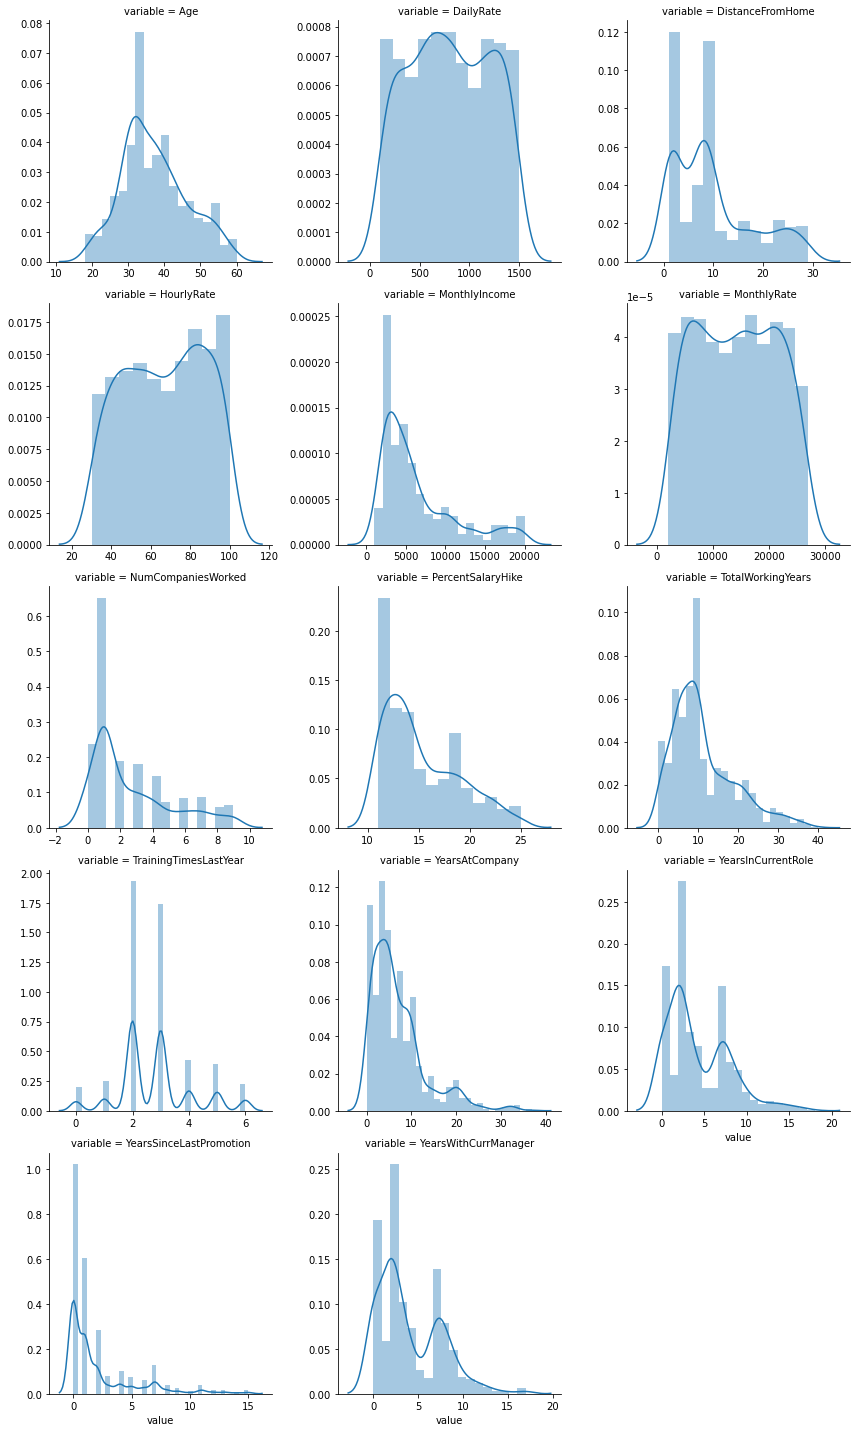

In [11]:
fig = sns.FacetGrid(numerical_features_melt, col='variable',
                   sharex=False, sharey=False, size=4,col_wrap=3)
fig.map(sns.distplot,'value')
plt.show()

In [12]:
totalworkingyears_arr = []
anderson_stat_arr = []
crit_val_arr = []
accepted_hypothesis_arr = []
result_arr = []

for i in numerical_features:
    totalworkingyears_arr.append(i)

    raw = anderson_normality_test(df[i])
    
    anderson_stat, crit_val, accepted_hypothesis = anderson_result_extractor(raw, 5)
    anderson_stat_arr.append(anderson_stat)
    crit_val_arr.append(crit_val)
    accepted_hypothesis_arr.append(accepted_hypothesis)

    if accepted_hypothesis == 'H0':        
        result_arr.append('Berdistribusi normal')
    else:
        result_arr.append('Tidak berdistribusi normal')

normality_df = pd.DataFrame({
    'TotalWorkingYears': totalworkingyears_arr,
    'Anderson Statistic': anderson_stat_arr,
    'Critical Value': crit_val_arr,
    'Accepted Hypothesis': accepted_hypothesis_arr,
    'Result': result_arr
})

print('Significance Level = 5%')
normality_df

Significance Level = 5%


,TotalWorkingYears,Anderson Statistic,Critical Value,Accepted Hypothesis,Result
0,Age,8.624723,0.784,HA,Tidak berdistribusi normal
1,DailyRate,10.706414,0.784,HA,Tidak berdistribusi normal
2,DistanceFromHome,41.943765,0.784,HA,Tidak berdistribusi normal
3,HourlyRate,12.856666,0.784,HA,Tidak berdistribusi normal
4,MonthlyIncome,63.867079,0.784,HA,Tidak berdistribusi normal
5,MonthlyRate,12.060483,0.784,HA,Tidak berdistribusi normal
6,NumCompaniesWorked,63.897459,0.784,HA,Tidak berdistribusi normal
7,PercentSalaryHike,32.841681,0.784,HA,Tidak berdistribusi normal
8,TotalWorkingYears,28.488059,0.784,HA,Tidak berdistribusi normal
9,TrainingTimesLastYear,48.862896,0.784,HA,Tidak berdistribusi normal


**Temuan** : Semua numerical features tidak berdistribusi normal berdasarkan uji normalitas Anderson-Darling dengan significance level sebesar 5%

# Univariate Outlier Analysis

In [13]:
def boxplot_for_outlier(data):
    data=data.melt()
    plt.figure(figsize=(15,10))
    plt.title("Boxplots for Numerical variables")
    bp=sns.boxplot(x='value',y='variable',data=data)
    bp.set_xticklabels(bp.get_xticklabels())
    plt.show()

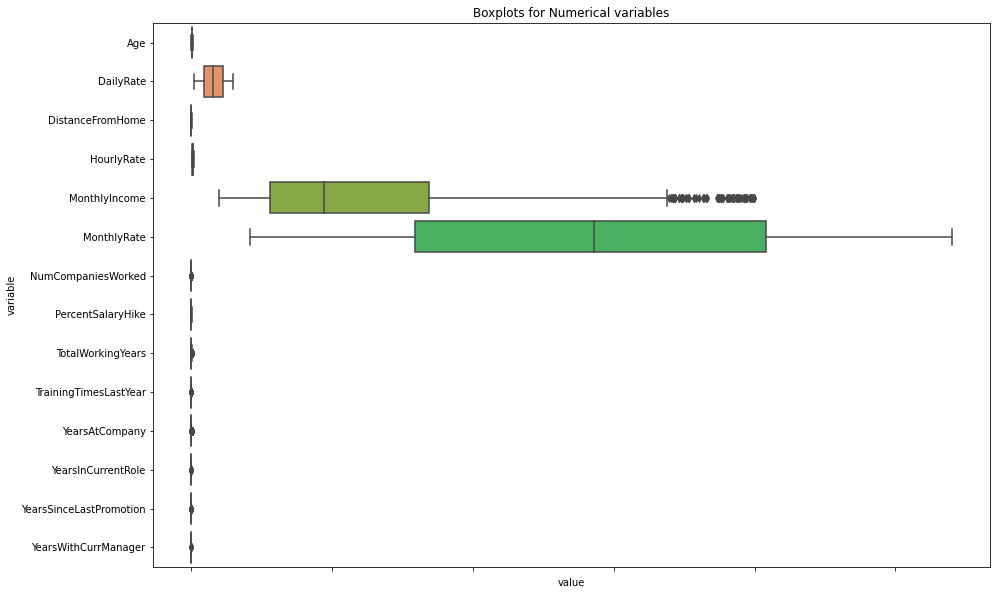

In [14]:
boxplot_for_outlier(numerical_features)

Berhubung plot diatas menghasilkan grafik yang kurang nyaman dilihat, maka akan dipecah menjadi beberapa bagian.

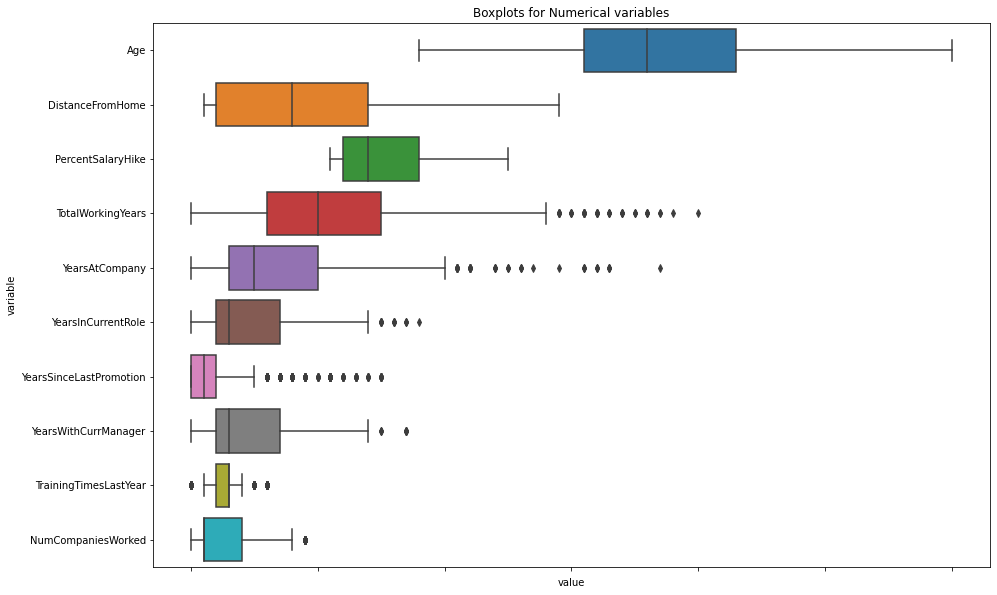

In [15]:
numerical_features=df[['Age','DistanceFromHome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','YearsSinceLastPromotion','TrainingTimesLastYear','NumCompaniesWorked']]
boxplot_for_outlier(numerical_features)

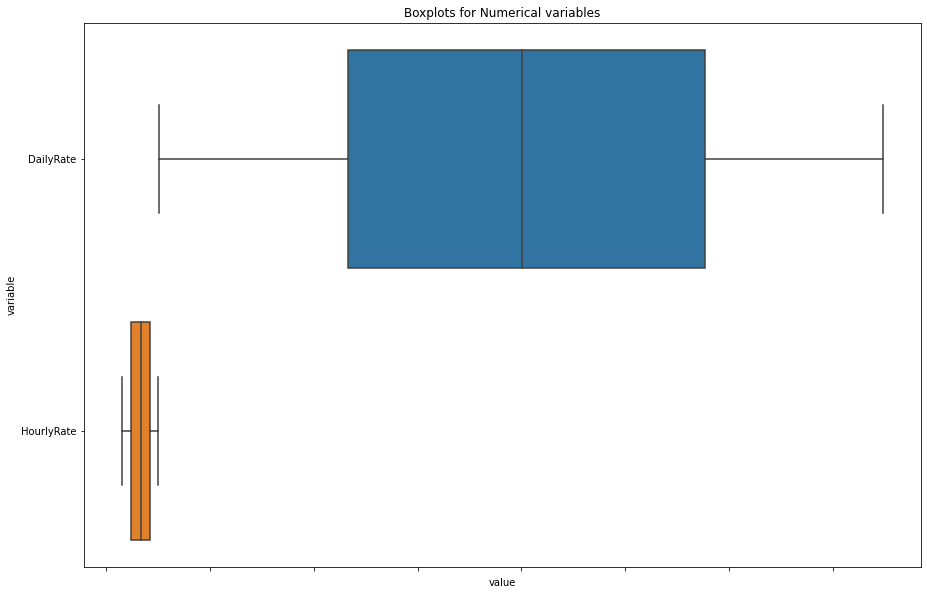

In [16]:
numerical_features=df[['DailyRate','HourlyRate']]
boxplot_for_outlier(numerical_features)

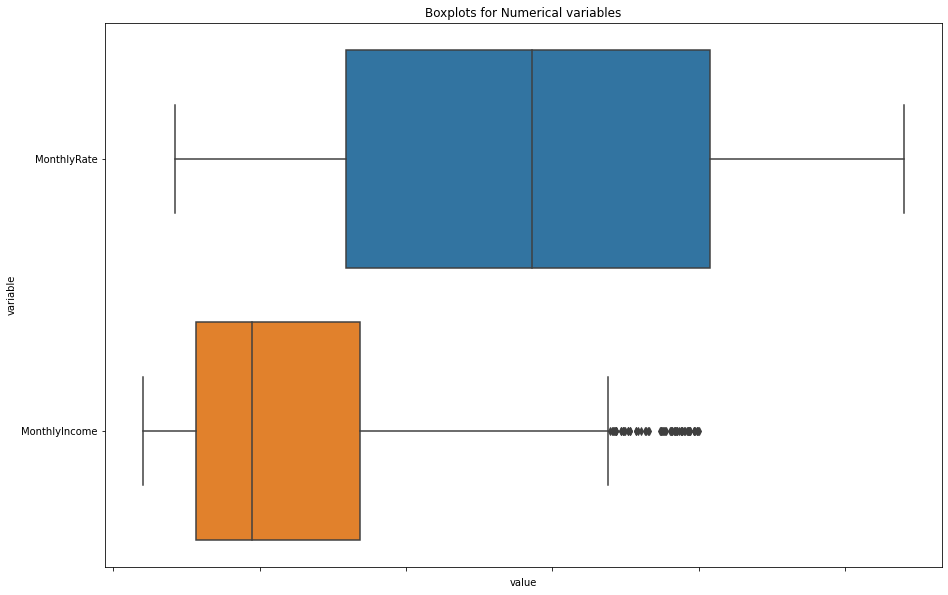

In [17]:
numerical_features=df[['MonthlyRate','MonthlyIncome']]
boxplot_for_outlier(numerical_features)

**Temuan** : Terdapat outlier pada feature berikut.
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager
- TrainingTimesLastYear
- NumCompaniesWorked
- MonthlyIncome


In [18]:
outlier_columns  = ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                    'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear',
                    'NumCompaniesWorked', 'MonthlyIncome']

counter_arr = []
percentage_arr = []

for i in outlier_columns:
    counter, percentage = outlier_counter(df, i)
    counter_arr.append(counter)
    percentage_arr.append(percentage)

outlier_df = pd.DataFrame({
    'Outlier Columns': outlier_columns,
    'Outlier Count': counter_arr,
    'Percentage': percentage_arr
})

outlier_df

,Outlier Columns,Outlier Count,Percentage
0,TotalWorkingYears,45,4.37
1,YearsAtCompany,43,4.18
2,YearsInCurrentRole,16,1.55
3,YearsSinceLastPromotion,149,14.48
4,YearsWithCurrManager,9,0.87
5,TrainingTimesLastYear,163,15.84
6,NumCompaniesWorked,38,3.69
7,MonthlyIncome,68,6.61


# Multivariate Outlier Analysis

In [25]:
numerical_features = df.select_dtypes(exclude='O')
numerical_features = numerical_features.drop(columns=categorical_by_behaviour, axis=1)
mahalanobis_df = numerical_features.copy()

Selanjutnya, akan dilakukan Multivariate Outlier Analysis menggunakan Mahalanobis Distance.

In [26]:
mahalanobis_df['mahalanobis_distance'] = Mahalanobis(np.array(mahalanobis_df), len(mahalanobis_df)).distances

In [27]:
ppf = chi2.ppf(0.99,df=len(numerical_features.columns)-1)
ppf

27.68824961045705

Apabila nilai Mahalanobis Distance lebih dari nilai Percent point function (yang pada kasus ini bernilai 27.68824961045705), ada kemungkinan bahwa ia adalah outlier.
Akan kita cek terlebih dahulu dengan cara membandingkan Mahalanobis Distance dan juga ppf.

In [29]:
len(mahalanobis_df[mahalanobis_df.mahalanobis_distance > ppf])

0

**Temuan** : Dengan membandingkan Mahalanobis Distance dan ppf (dengan confidence level 0.99), tidak ditemukan adanya outlier. 

Kita lakukan double check menggunakan cdf (Cumulative distribution function).

In [30]:
cdf = chi2.cdf(mahalanobis_df['mahalanobis_distance'], len(numerical_features.columns)-1)
mahalanobis_df['P-value'] = 1 - cdf

In [31]:
def callout_outlier(p_values):
    if p_values < 0.01:
        return 'Outlier'
    else:
        return 'Non-Outlier'

In [32]:
mahalanobis_df['Outlier Detector'] = mahalanobis_df['P-value'].apply(callout_outlier)

In [33]:
mahalanobis_df = mahalanobis_df.drop(columns=['mahalanobis_distance', 'P-value'], axis=1)

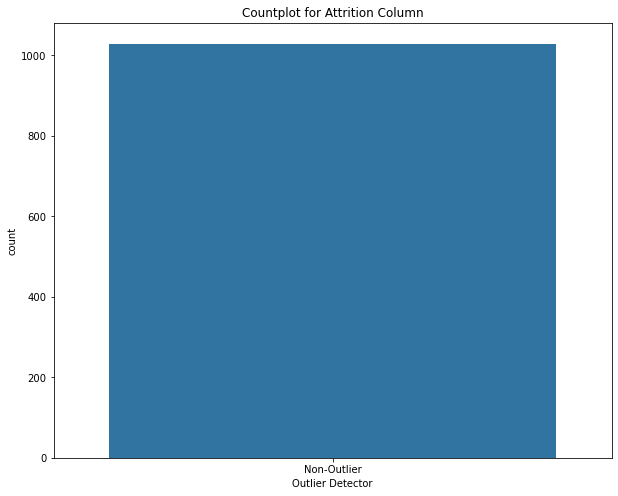

In [34]:
plt.figure(figsize = (10, 8))
plot=sns.countplot(x = 'Outlier Detector', data = mahalanobis_df)
plt.title("Countplot for Attrition Column")
plt.show()

In [35]:
# sns.pairplot(mahalanobis_df)
mahalanobis_df['Outlier Detector'].value_counts(normalize = True)

Non-Outlier    1.0
Name: Outlier Detector, dtype: float64

**Temuan** : Dengan Mahalanobis Distance, dinyatakan bahwa keseluruhan data dinyatakan sebagai bukan outlier

Dengan temuan ini, maka saya memutuskan untuk tidak melakukan drop beberapa rows yang dinyatakan sebagai univariate outlier, karena:
- Dataset berukuran kecil. Membuang beberapa rows akan memungkinkan mengubah karakteristik data.
- Meskipun beberapa rows dinyatakan sebagai univariate outlier, namun secara keseluruhan, ia dinyatakan bukan outlier dengan menggunakan Mahalanobis Distance. 

# Numerical Bivariate Analysis


Ini adalah bagian dimana kita akan membandingkan antara semua numerical feature dengan Attrition.

In [37]:
numerical_features = df.select_dtypes(exclude='O')
numerical_features = numerical_features.drop(columns=categorical_by_behaviour, axis=1)
numerical_features['Attrition']=df['Attrition']
numerical_features_melt = numerical_features.melt(id_vars=['Attrition'])

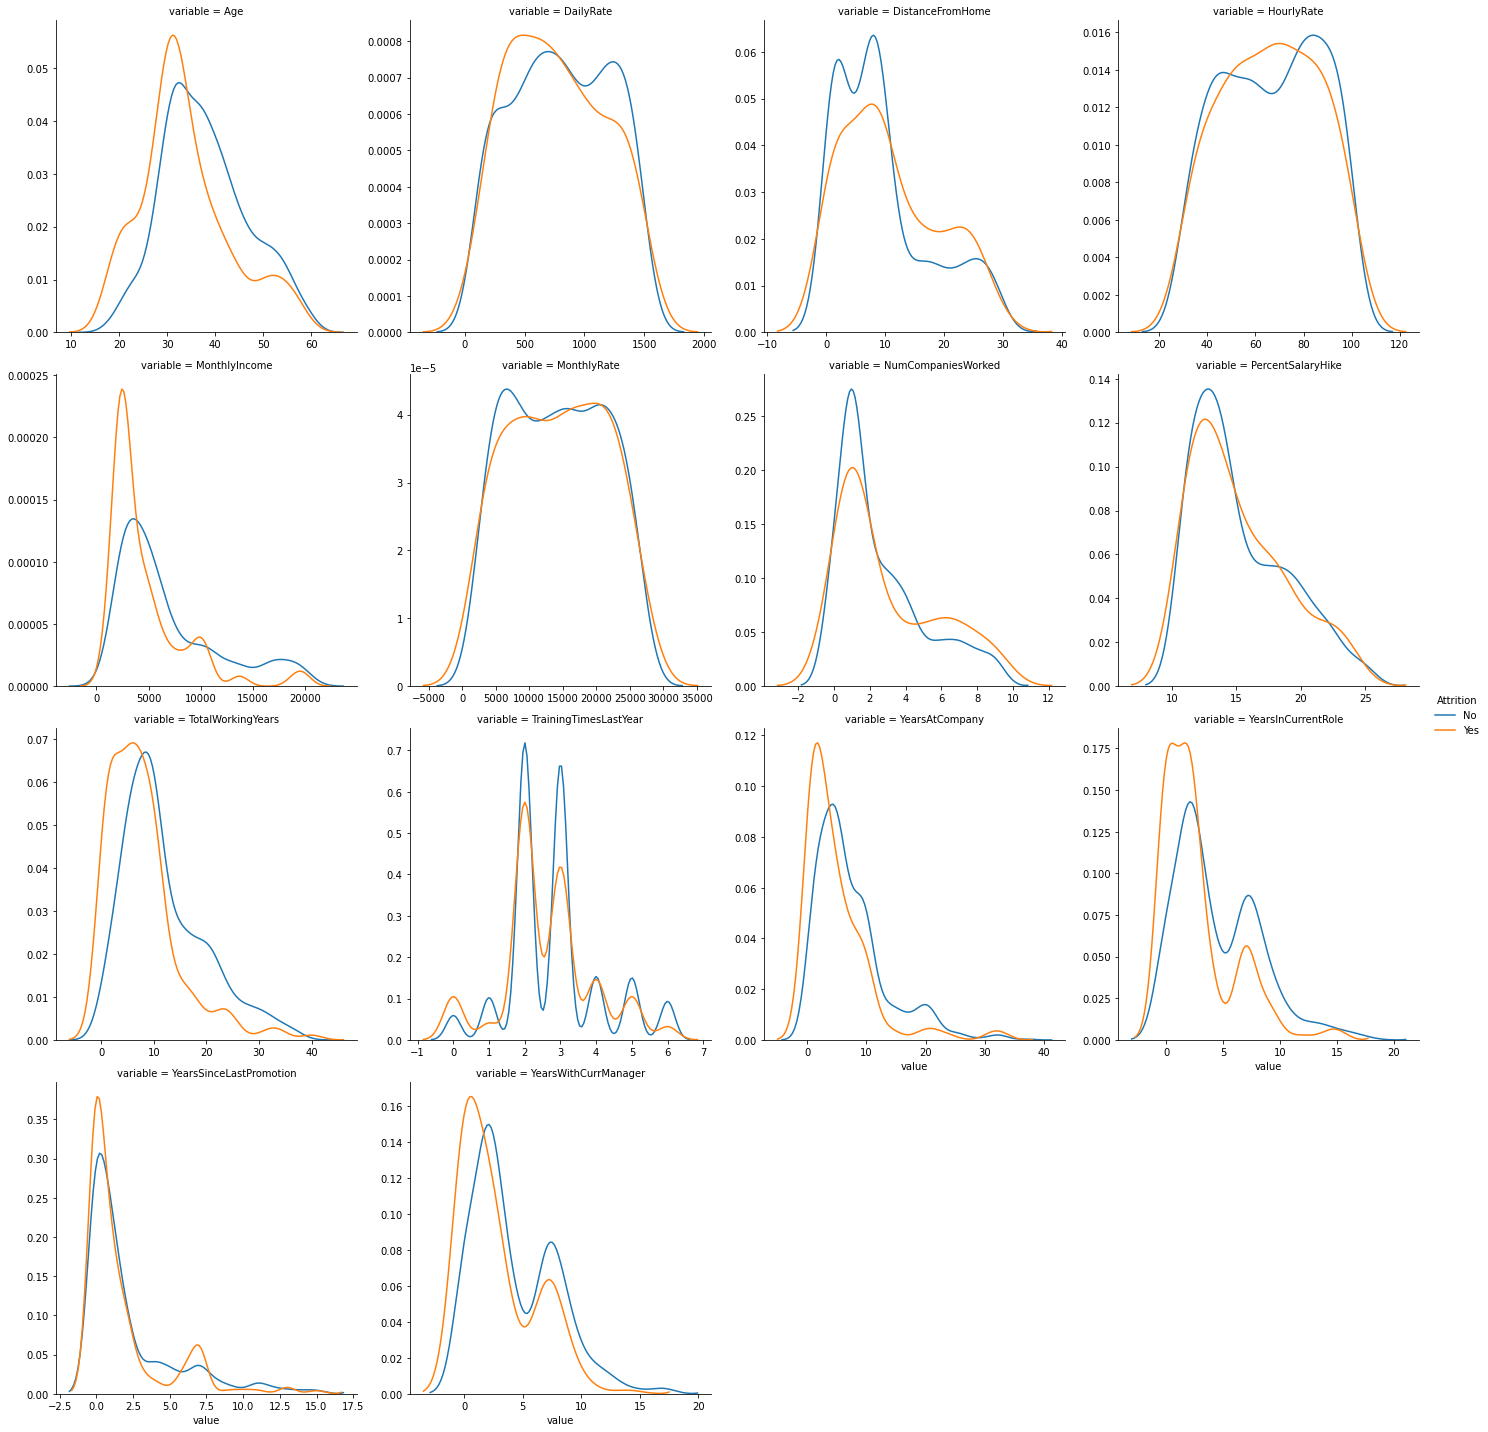

In [38]:
numerical_features_melt = numerical_features.melt(id_vars=['Attrition'])
grid = sns.FacetGrid(numerical_features_melt,
                              col='variable',
                              sharex=False,
                              sharey=False,
                              dropna=True,
                              size=5,
                              col_wrap=4,
                              hue='Attrition' )
histPlot=grid.map(sns.kdeplot,'value' )
grid.add_legend()
plt.show()

**Temuan** : Beberapa hal yang memengaruhi Attrition adalah,
- Usia pegawai yang berusia sekitar 30 tahun lebih banyak keluar
- Pegawai dengan jarak ke kantor yang mendekati 0, cenderung bertahan
- Pegawai dengan MonthlyIncome dibawah 5000 lebih banyak keluar

Selanjutnya, Heatmap.
Meskipun pada Notebook sebelumnya kita telah menampilkan Heatmap untuk keperluan mengisi missing value, namun akan kita tampilkan lagi untuk analisa lebih lanjut.

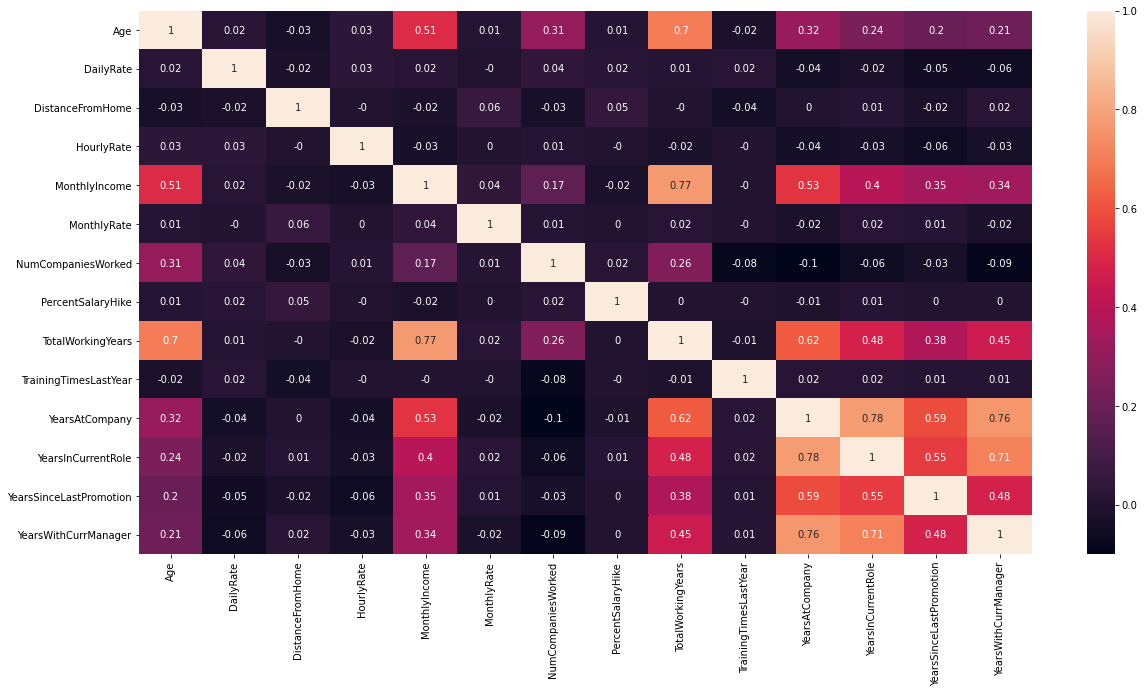

In [40]:
numerical_features = df.select_dtypes(exclude='O')
numerical_features = numerical_features.drop(columns=categorical_by_behaviour, axis=1)
plt.figure(figsize=(20,10))
sns.heatmap(round(numerical_features.corr(),2),annot=True,mask=None)
plt.show()

**Temuan** :
- Semakin Bertambah usia pegawai, bertambah pula TotalWorkingYearsnya
- Semakin tinggi jabatan (JobLevel), semakin tinggi pula MonthlyIncome-nya.
- Semakin bertambah TotalWorkingYears, pegawai cenderung mendapatkan promosi jabatan (JobLevel)
- MonthlyIncome meningkat pada pegawai yang TotalWorkingYearsnya bertambah
- Semakin tinggi PerfomanceRating, makin tinggi pula persentase kenaikan gaji (PercentSalaryHike)
- Korelasi antara TotalWorkingYears dan YearsAtCompany menunjukkan bahwa semakin lama seseorang pegawai bekerja, semakin cenderung dirinya memilih bertahan 
- YearsAtCompany, YearsWithCurrManager, YearsInCurrentRole berkorelasi satu sama lain.